## 

In [152]:
import numpy as np
import pandas as pd
#from pandas import DataFrame

import pickle
import palettable
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard

from src.impact_calculation.impact_heat import *
from src.util.plots import *

fig_dir = '../../data_analysis/figures/'

## Damage cost for each scenario, year and labor type

In [153]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_1000mc_all_uncertainties_CH.pickle','rb')
loss_productivity = pickle.load(pickle_in)  
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/matrix_all_branches_1000mc_all_uncertainties_CH.pickle','rb')
matrices_productivity = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2020','2035','2050']
n_mc=1000
impact_productivity = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity.agg_impacts_mc = loss_productivity
impact_productivity.median_impact_matrices = matrices_productivity 


In [179]:
exposures_high = Exposures()
exposures_high.read_hdf5('../../input_data/exposures/exposures_productivity_ch_OH.h5')
exposures_high['value'] = exposures_high['value']*8*52*5

exposures_low = Exposures()
exposures_low.read_hdf5('../../input_data/exposures/exposures_productivity_ch_IL.h5')
exposures_low['value'] = exposures_low['value']*8*52*5

exposures_im = Exposures()
exposures_im.read_hdf5('../../input_data/exposures/exposures_productivity_ch_IM.h5')
exposures_im['value'] = exposures_im['value']*8*52*5

exposures_om = Exposures()
exposures_om.read_hdf5('../../input_data/exposures/exposures_productivity_ch_OM.h5')
exposures_om['value'] = exposures_om['value']*8*52*5

2020-11-04 09:43:35,227 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_OH.h5
2020-11-04 09:43:36,353 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_IL.h5
2020-11-04 09:43:37,473 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_IM.h5
2020-11-04 09:43:39,083 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_productivity_ch_OM.h5


In [155]:
cat ='outside high physical activity'
impact_high = impact_productivity.matrix_as_impact(impact_productivity.median_impact_matrices['RCP85']['2050'][cat],exposures, percentage=True, unit='%')


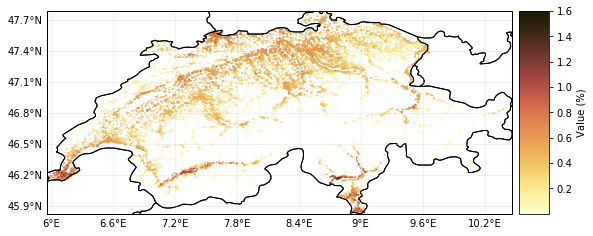

In [156]:
cm = palettable.scientific.sequential.LaJolla_20.mpl_colormap

impact_high.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, vmax=1.6)

In [157]:
categories = {'inside low physical activity': 'IL', 'inside moderate physical activity': 'IM',
                           'outside moderate physical activity': 'OM', 'outside high physical activity': 'OH'}
relative_matrices = impact_productivity.get_relative_change_matrices('2020', categories)

In [158]:
relative_matrice_high = impact_productivity.matrix_as_impact(relative_matrices['RCP85']['2050']['outside high physical activity'],
                                                            exposures, percentage=False, unit='%')

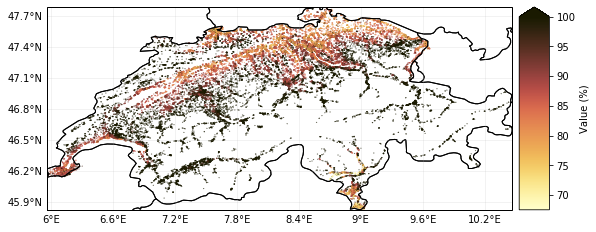

In [150]:
relative_matrice_high.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, vmax=100, extend='max')

In [159]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_1000mc_all_uncertainties_CH_2065.pickle','rb')
loss_productivity_2065 = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2065']
n_mc=1000
impact_productivity_2065 = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity_2065.agg_impacts_mc = loss_productivity_2065

impact_productivity.append_years(impact_productivity_2065)

In [160]:
pickle_in = \
open('/Users/zeliestalhanske/Documents/GitHub/master_thesis/output/impact_ch/impacts_all_branches_100mc_all_uncertainties_CH_2080.pickle','rb')
loss_productivity_2080 = pickle.load(pickle_in) 
scenarios = ['RCP26', 'RCP45', 'RCP85']
years = ['2080']
n_mc=1000
impact_productivity_2080 = ImpactsHeatProductivity(scenarios, years, n_mc)
impact_productivity_2080.agg_impacts_mc = loss_productivity_2080
impact_productivity.append_years(impact_productivity_2080)

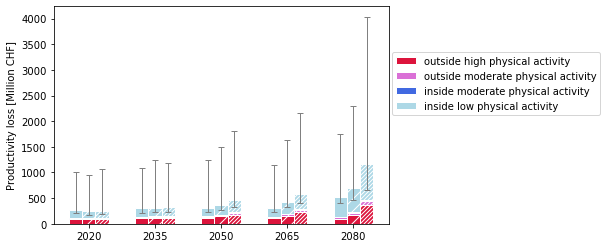

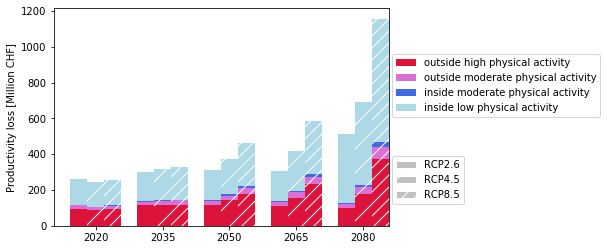

In [161]:
impact_productivity.costs_in_millions()
plot_impacts_heat(impact_productivity.agg_impacts_mc, 'Productivity loss [Million CHF]', color=['crimson','orchid','royalblue','lightblue'])


In [178]:
impact_productivity.agg_impacts_mc['RCP85']['2050'].mean()

outside high physical activity        217.061811
outside moderate physical activity     39.956532
inside moderate physical activity      21.928304
inside low physical activity          275.978660
total                                 554.925307
dtype: float64

In [187]:
il_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['inside low physical activity'].mean()/(exposures_low.value.sum()/1000000)
oh_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['outside high physical activity'].mean()/(exposures_high.value.sum()/1000000)
om_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['outside moderate physical activity'].mean()/(exposures_om.value.sum()/1000000)
im_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['inside moderate physical activity'].mean()/(exposures_im.value.sum()/1000000)
total_percent = 100*impact_productivity.agg_impacts_mc['RCP85']['2050']['total'].mean()/((exposures_low.value.sum()+exposures_high.value.sum()+exposures_om.value.sum()+exposures_im.value.sum())/1000000)



In [198]:
impact_productivity.agg_impacts_mc['RCP26']['2080']['outside high physical activity'].mean()/impact_productivity.agg_impacts_mc['RCP26']['2080']['total'].mean()



0.25104576829915987